# Module 4: j vs Voltage Analysis

This notebook reads data from `raw_data_ekfis_m4.xlsx` and plots the relationship between current density (j in mA/cm²) and Voltage for each sheet in the Excel file.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the Excel file to get sheet names
filepath = 'raw_data_ekfis_m4.xlsx'

# Get all sheet names using openpyxl
wb = load_workbook(filepath, read_only=True)
sheet_names = wb.sheetnames
print(f"Available sheets in the Excel file: {sheet_names}")

Available sheets in the Excel file: ['fotoelektrokimia_gelap', 'fotoelektrokimia_terang', 'elektrokimia_cu']


In [3]:
# Read first sheet to understand data structure
first_sheet = pd.read_excel(filepath, sheet_name=sheet_names[0])

# Display first few rows to understand the data structure
print(f"Preview of data from {sheet_names[0]}:")
first_sheet.head()

Preview of data from fotoelektrokimia_gelap:


,Voltage measured,Current measured,j (mA/cm2)
0,-0.005,-0.00002,-0.000005
1,-0.011,0.00002,0.000005
2,-0.021,0.00000,0.000000
3,-0.026,0.00000,0.000000
4,-0.042,-0.00002,-0.000005


In [4]:
def process_sheet(sheet_name):
    """
    Read and process data from a specific sheet.
    
    Args:
        sheet_name: Name of the sheet to process
        
    Returns:
        DataFrame with Voltage and j (mA/cm²) columns
    """
    # Read the sheet
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    
    # Based on the data preview, we know the exact column names
    voltage_col = 'Voltage measured'
    current_density_col = 'j (mA/cm2)'
    
    # Confirm the columns exist in this sheet
    if voltage_col not in df.columns:
        # Try some alternatives
        for col in df.columns:
            if 'volt' in col.lower():
                voltage_col = col
                break
        if voltage_col not in df.columns:
            voltage_col = df.columns[0]  # Default to first column
    
    if current_density_col not in df.columns:
        # Try some alternatives
        for col in df.columns:
            if 'j ' in col.lower() and 'cm' in col.lower():
                current_density_col = col
                break
        if current_density_col not in df.columns and len(df.columns) > 2:
            current_density_col = df.columns[2]  # Third column based on the preview
    
    # Select and rename columns for clarity
    result_df = df[[voltage_col, current_density_col]].copy()
    result_df.columns = ['Voltage', 'j (mA/cm²)']
    
    # Clean data - drop any rows with missing values
    result_df = result_df.dropna()
    
    # Sort by voltage for cleaner plots
    result_df = result_df.sort_values('Voltage')
    
    return result_df

Successfully processed and plotted data from sheet: fotoelektrokimia_gelap
Successfully processed and plotted data from sheet: fotoelektrokimia_terang
Successfully processed and plotted data from sheet: elektrokimia_cu


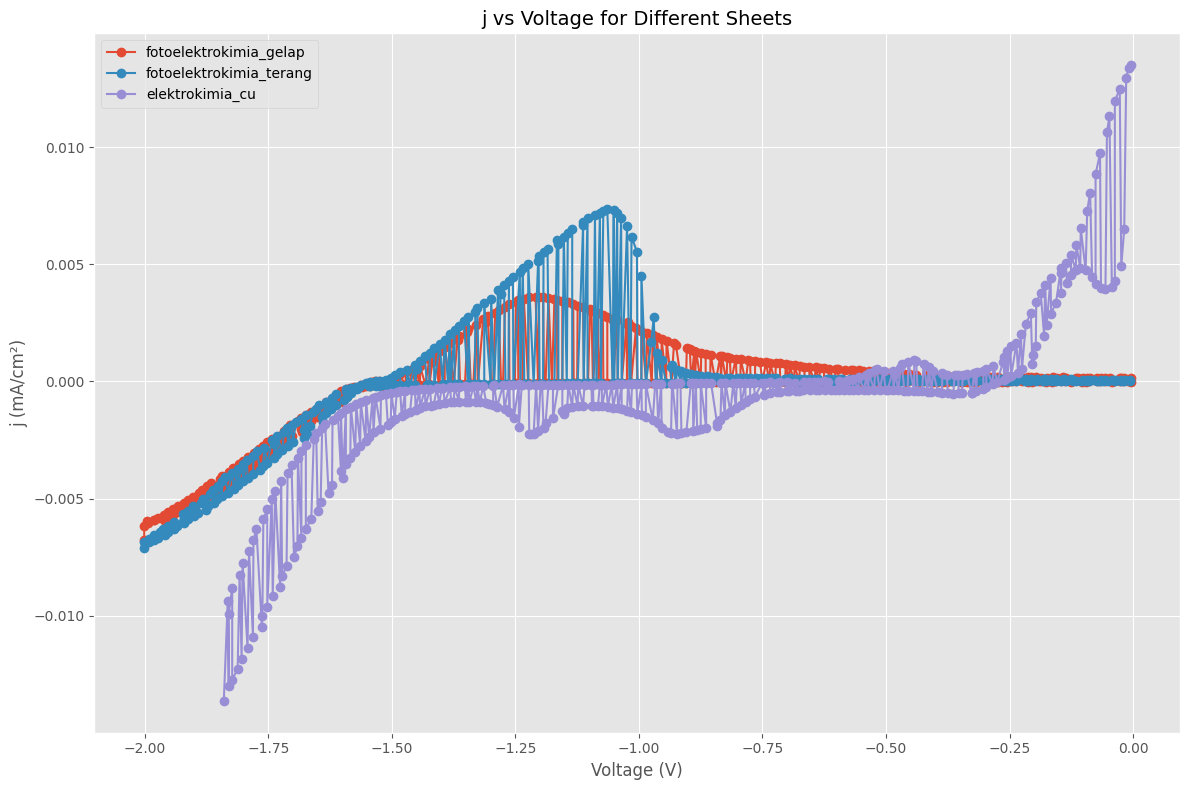

In [5]:
# Create individual plots for each sheet
plt.figure(figsize=(12, 8))

for sheet_name in sheet_names:
    try:
        # Process the sheet data
        data = process_sheet(sheet_name)
        
        # Plot the data
        plt.plot(data['Voltage'], data['j (mA/cm²)'], marker='o', linestyle='-', label=sheet_name)
        
        print(f"Successfully processed and plotted data from sheet: {sheet_name}")
    except Exception as e:
        print(f"Error processing sheet '{sheet_name}': {e}")

# Add labels and title
plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('j (mA/cm²)', fontsize=12)
plt.title('j vs Voltage for Different Sheets', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

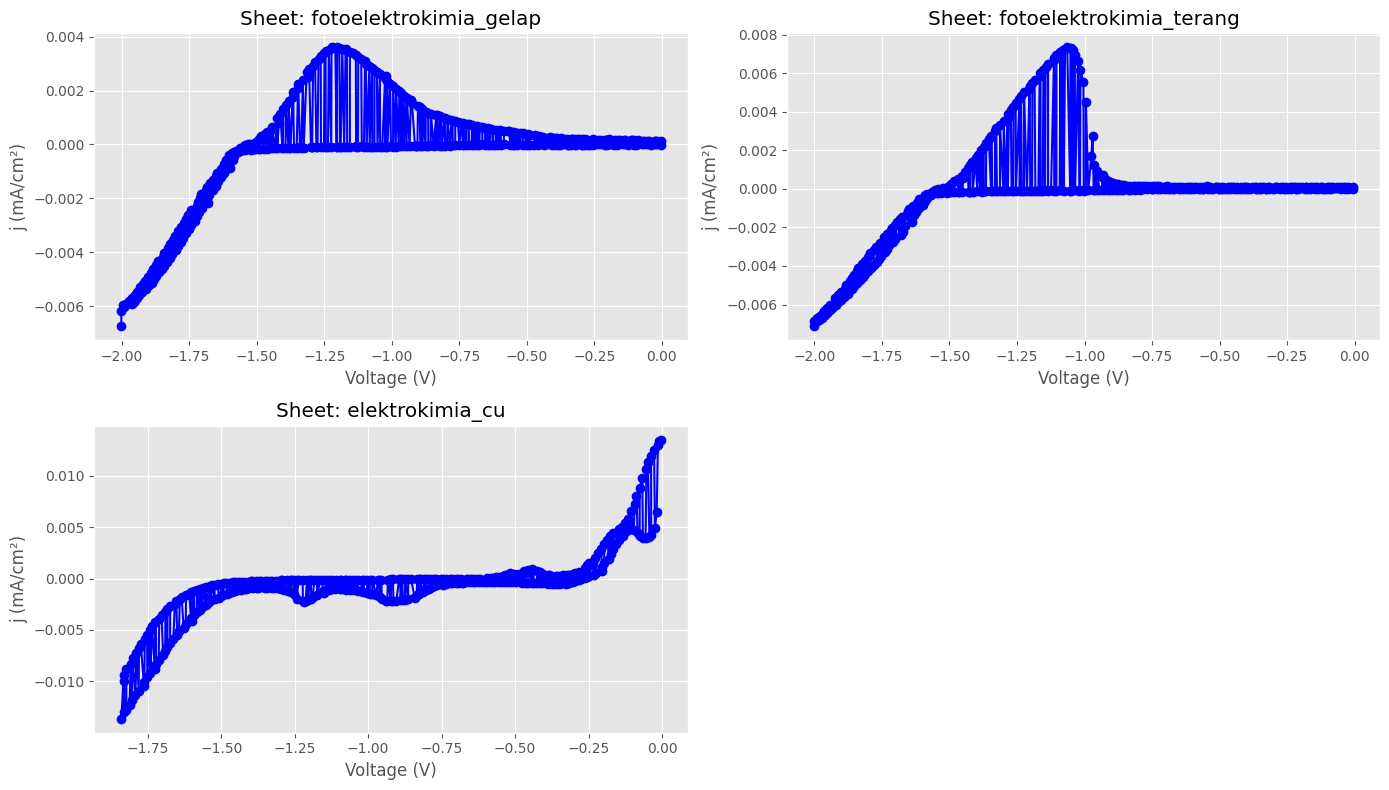

In [6]:
# Create subplots for each sheet
num_sheets = len(sheet_names)
rows = (num_sheets + 1) // 2  # Ceiling division to get number of rows

fig, axes = plt.subplots(rows, 2, figsize=(14, 4*rows))
axes = axes.flatten()

for i, sheet_name in enumerate(sheet_names):
    if i < len(axes):
        try:
            # Process the sheet data
            data = process_sheet(sheet_name)
            
            # Plot on the corresponding subplot
            axes[i].plot(data['Voltage'], data['j (mA/cm²)'], marker='o', linestyle='-', color='blue')
            axes[i].set_xlabel('Voltage (V)')
            axes[i].set_ylabel('j (mA/cm²)')
            axes[i].set_title(f'Sheet: {sheet_name}')
            axes[i].grid(True)
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Error: {e}", ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'Sheet: {sheet_name} (Error)')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Generate summary statistics for each sheet
results = []

for sheet_name in sheet_names:
    try:
        data = process_sheet(sheet_name)
        stats = {
            'Sheet': sheet_name,
            'Min j (mA/cm²)': data['j (mA/cm²)'].min(),
            'Max j (mA/cm²)': data['j (mA/cm²)'].max(),
            'Mean j (mA/cm²)': data['j (mA/cm²)'].mean(),
            'Min Voltage': data['Voltage'].min(),
            'Max Voltage': data['Voltage'].max()
        }
        results.append(stats)
    except Exception as e:
        print(f"Could not calculate statistics for sheet '{sheet_name}': {e}")

# Convert to DataFrame for better display
summary_df = pd.DataFrame(results)
if not summary_df.empty:
    summary_df

## Analysis of j vs Voltage Plots

The plots above show the relationship between current density (j in mA/cm²) and Voltage for three different experimental conditions:

1. **fotoelektrokimia_gelap** - Photoelectrochemical measurements in dark conditions
2. **fotoelektrokimia_terang** - Photoelectrochemical measurements in light conditions
3. **elektrokimia_cu** - Electrochemical measurements with copper

Let's display the summary statistics for each condition:

In [8]:
# Display the summary statistics table
summary_df

,Sheet,Min j (mA/cm²),Max j (mA/cm²),Mean j (mA/cm²),Min Voltage,Max Voltage
0,fotoelektrokimia_gelap,-0.00675,0.00361,-0.000304,-2.001,-0.005
1,fotoelektrokimia_terang,-0.00713,0.00735,-0.000228,-2.002,-0.006
2,elektrokimia_cu,-0.01364,0.01350,-0.000607,-1.840,-0.005


## Observations

- **Photoelectrochemical (Dark vs Light)**: 
  - Both dark and light conditions show similar trends in the j-V curve, but the light condition exhibits higher current density peaks, indicating the photoresponse of the material.
  - The peak current density occurs around -1.25V for both conditions.
  
- **Electrochemical (Cu)**:
  - The copper sample shows a different behavior, with negative current density at lower voltages (below -1.5V) and a sharp increase in positive current density near 0V.
  - This suggests different electrochemical reaction mechanisms compared to the photoelectrochemical samples.

## Conclusion

The j-V characterization reveals distinct electrochemical behaviors between the samples. The photoelectrochemical samples show photoresponsive behavior with increased current density under illumination, while the copper sample demonstrates unique redox characteristics with a sharp increase in current near 0V, likely related to copper oxidation/reduction processes.

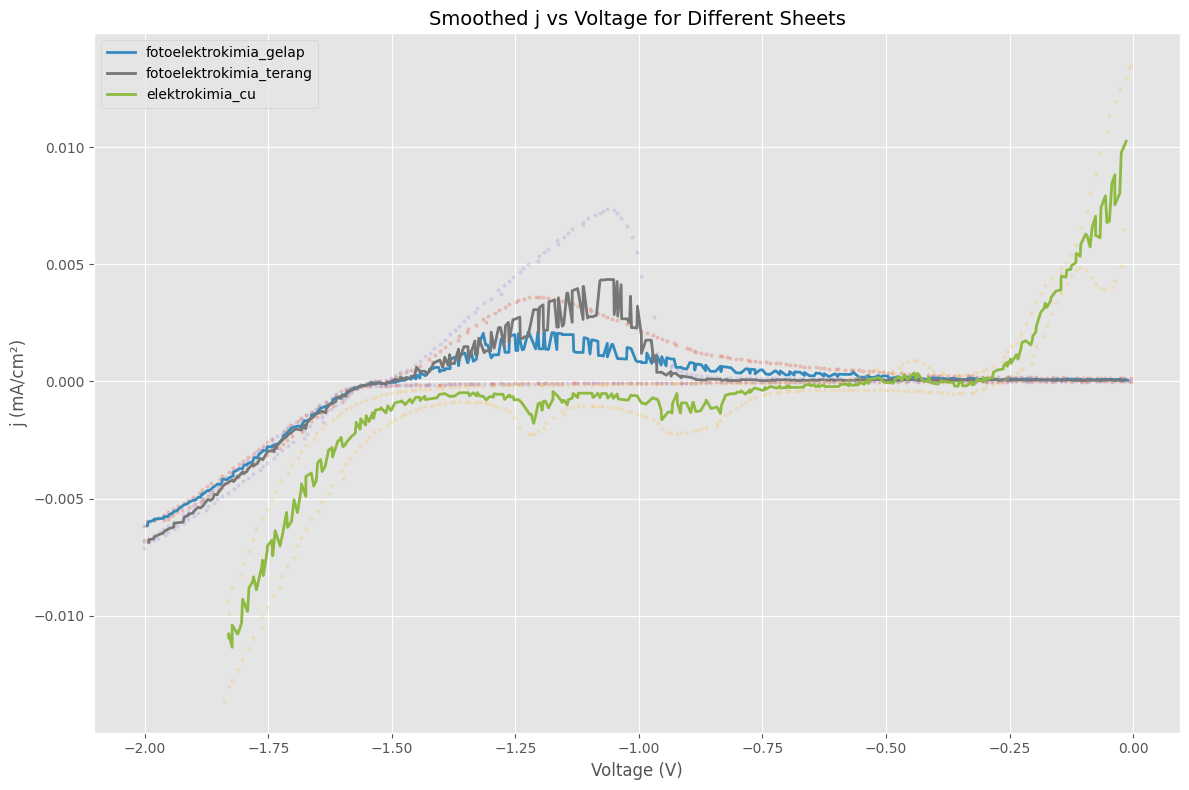

In [9]:
# Create a smoothed version of the combined plot
plt.figure(figsize=(12, 8))

for sheet_name in sheet_names:
    try:
        # Process the sheet data
        data = process_sheet(sheet_name)
        
        # Apply moving average for smoothing
        window_size = 5
        data['j_smooth'] = data['j (mA/cm²)'].rolling(window=window_size, center=True).mean()
        
        # Plot both the original data (with transparency) and the smoothed line
        plt.plot(data['Voltage'], data['j (mA/cm²)'], 'o', alpha=0.2, markersize=2)
        plt.plot(data['Voltage'], data['j_smooth'], linewidth=2, label=f'{sheet_name}')
        
    except Exception as e:
        print(f"Error processing sheet '{sheet_name}': {e}")

# Add labels and title
plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('j (mA/cm²)', fontsize=12)
plt.title('Smoothed j vs Voltage for Different Sheets', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()